## $\chi$ parameters

$\chi$ parameters introduced by [Ackland and Jones](http://pyscal.com/en/latest/methods/angularmethods/chiparams.html) measures the angles generated by pairs of neighbor atom around the host atom, and assigns it to a histogram to calculate a local structure. In this example, we will create different crystal structures and see how the $\chi$ parameters change with respect to the local coordination.

In [1]:
import pyscal.core as pc
import pyscal.crystal_structures as pcs
import matplotlib.pyplot as plt
import numpy as np

The :mod:`~pyscal.crystal_structures` module is used to create different perfect crystal structures. The created atoms and simulation box is then assigned to a :class:`~pyscal.core.System` object. For this example, fcc, bcc, hcp and diamond structures are created.

In [2]:
fcc_atoms, fcc_box = pcs.make_crystal('fcc', lattice_constant=4, repetitions=[4,4,4])
fcc = pc.System()
fcc.atoms = fcc_atoms
fcc.box = fcc_box

In [3]:
bcc_atoms, bcc_box = pcs.make_crystal('bcc', lattice_constant=4, repetitions=[4,4,4])
bcc = pc.System()
bcc.atoms = bcc_atoms
bcc.box = bcc_box

In [4]:
hcp_atoms, hcp_box = pcs.make_crystal('hcp', lattice_constant=4, repetitions=[4,4,4])
hcp = pc.System()
hcp.atoms = hcp_atoms
hcp.box = hcp_box

In [5]:
dia_atoms, dia_box = pcs.make_crystal('diamond', lattice_constant=4, repetitions=[4,4,4])
dia = pc.System()
dia.atoms = dia_atoms
dia.box = dia_box

Before calculating $\chi$ parameters, the [neighbors for each atom](http://pyscal.com/en/latest/methods/nearestneighbormethods/nearestneighbormethods.html) need to be found.

In [6]:
fcc.find_neighbors(method='cutoff', cutoff='adaptive')
bcc.find_neighbors(method='cutoff', cutoff='adaptive')
hcp.find_neighbors(method='cutoff', cutoff='adaptive')
dia.find_neighbors(method='cutoff', cutoff='adaptive')

Now, $\chi$ parameters can be calculated

In [7]:
fcc.calculate_chiparams()
bcc.calculate_chiparams()
hcp.calculate_chiparams()
dia.calculate_chiparams()

The calculated parameters for each atom can be accessed using the :attr:`~pyscal.catom.Atom.chiparams` attribute.

In [8]:
fcc_atoms = fcc.atoms
bcc_atoms = bcc.atoms
hcp_atoms = hcp.atoms
dia_atoms = dia.atoms

In [9]:
fcc_atoms[10].chiparams

[6, 0, 0, 0, 24, 12, 0, 24, 0]

The output is an array of length 9 which shows the number of neighbor angles found within specific bins as explained [here](http://pyscal.com/en/latest/methods/angularmethods/chiparams.html). The output for one atom from each structure is shown below.

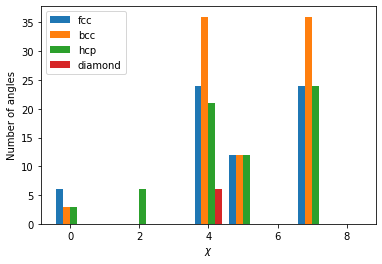

In [28]:
plt.bar(np.array(range(9))-0.3, fcc_atoms[10].chiparams, width=0.2, label="fcc")
plt.bar(np.array(range(9))-0.1, bcc_atoms[10].chiparams, width=0.2, label="bcc")
plt.bar(np.array(range(9))+0.1, hcp_atoms[10].chiparams, width=0.2, label="hcp")
plt.bar(np.array(range(9))+0.3, dia_atoms[10].chiparams, width=0.2, label="diamond")
plt.xlabel("$\chi$")
plt.ylabel("Number of angles")
plt.legend()

The atoms exhibit a distinct fingerprint for each structure. Structural identification can be made up comparing the ratio of various $\chi$ parameters as described in the [original publication](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.73.054104).